In [4]:
# Capstone project : Pneumonia detection based on chest X-Ray Images
# Francois Masson
# September 2018

# Step 0 : Import Data set

# All the images inside the ‘Normal’ named folder will be considered as Normal by keras.
# All the images inside the ‘Pneumonia’ named folder will be considered as Pneumonia by keras.

from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 2)
    return files,targets

# The data provided in Kaggle are already split in train test and validation set

# load train, test, and validation datasets
train_files,train_target = load_dataset('./chest_xray/train')
test_files,test_target = load_dataset('./chest_xray/test')
valid_files,valid_target = load_dataset('./chest_xray/val')

print('There are %d training chest X-Ray images.' % len(train_files))
print('There are %d test chest X-Ray images.'% len(test_files))
print('There are %d validation chest X-Ray images.' % len(valid_files))


There are 5216 training chest X-Ray images.
There are 624 test chest X-Ray images.
There are 16 validation chest X-Ray images.


In [11]:
# Step 1 : Creation of a CNN to classify normal and pneumonia detection based on chest X-Ray Images (from Scratch)
# Step 1-1 Preprocessing the data

from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(256, 256))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [12]:
# Step 1-2 : rescale the images by dividing every pixel in every image by 255.

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255



100%|██████████| 624/624 [00:11<00:00, 52.73it/s]


In [5]:
# Step 2 : Create a vanilla CNN model 

# Benchmark model

# Step 2-1 Define the architecture
#In a two class problem, there is no difference at all between using a softmax with two outputs or one binary output, 
# assuming you use a sigmoid (logistic) function to model the probability of the output. The two things are mathematically equivalent.

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()
# Step A - Convolution
classifier.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(256, 256, 3)))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Flatten())
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(2, activation='softmax'))

classifier.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
__________

In [5]:
from keras.utils import plot_model
plot_model(classifier, to_file='Model_png/model_scratch.png')

In [6]:
# Step 2-2 - Compile the model 
#classifier.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# F1 not support anymore with Keras so build-on 

import import_ipynb
from F1_score import f1

classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[f1])

importing Jupyter notebook from F1_score.ipynb


In [7]:
# Step 2-3 Train the model

from keras.callbacks import ModelCheckpoint  

epochs = 5


### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='./saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history = classifier.fit(train_tensors, train_target, 
          validation_data=(valid_tensors, valid_target),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/5
5216/5216 [==============================] - 429s 82ms/step - loss: 4.1055 - f1: 0.7419 - val_loss: 8.0151 - val_f1: 0.5000

Epoch 00001: val_loss improved from inf to 8.01512, saving model to ./saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
5216/5216 [==============================] - 423s 81ms/step - loss: 4.1213 - f1: 0.7429 - val_loss: 8.0151 - val_f1: 0.5000

Epoch 00002: val_loss did not improve from 8.01512
Epoch 3/5
5216/5216 [==============================] - 444s 85ms/step - loss: 4.1213 - f1: 0.7429 - val_loss: 8.0151 - val_f1: 0.5000

Epoch 00003: val_loss did not improve from 8.01512
Epoch 4/5
5216/5216 [==============================] - 377s 72ms/step - loss: 4.1213 - f1: 0.7429 - val_loss: 8.0151 - val_f1: 0.5000

Epoch 00004: val_loss did not improve from 8.01512
Epoch 5/5
5216/5216 [==============================] - 314s 60ms/step - loss: 4.1213 - f1: 0.7429 - val_loss: 8.0151 - val_f1: 0.5000

Epoch 00005:

In [8]:
# Step 2-4 Load the Model with the Best Validation Loss
classifier.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [9]:
# Step 2-5 Test the trained model

chest_xray_predictions = [np.argmax(classifier.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = np.sum(np.array(chest_xray_predictions)==np.argmax(test_target, axis=1))/len(chest_xray_predictions)
print('F1 score: ',test_accuracy)

F1 score:  0.625


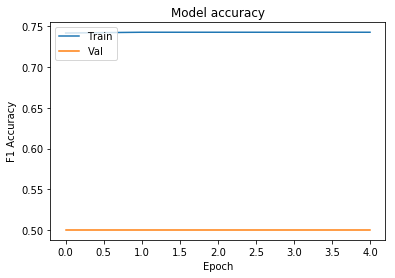

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1 Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

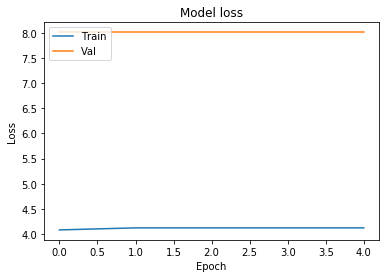

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [12]:
###################################################################

In [13]:
# Step 3 - Optimization 

# Step 3 - 1 : New CNN architecture

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

import import_ipynb
from F1_score import f1

# Initialising the CNN
classifier_op = Sequential()
# Step A - Convolution
classifier_op.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(256, 256, 3)))
classifier_op.add(MaxPooling2D(pool_size=2))
classifier_op.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
classifier_op.add(MaxPooling2D(pool_size=2))
classifier_op.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
classifier_op.add(MaxPooling2D(pool_size=2))
classifier_op.add(Conv2D(filters=16, kernel_size=4, padding='same', activation='relu'))
classifier_op.add(MaxPooling2D(pool_size=4))
classifier_op.add(Dropout(0.4))
classifier_op.add(Flatten())
classifier_op.add(Dense(500, activation = 'relu'))
classifier_op.add(Dropout(0.2))
classifier_op.add(Dense(2, activation='softmax'))

classifier_op.summary()

classifier_op.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1])

# Step 3 - 2 : Augmentation data (Validation part)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        './chest_xray/train',
        target_size=(256, 256),
        batch_size=20)

test_generator = test_datagen.flow_from_directory(
        './chest_xray/test',
        target_size=(256, 256),
        batch_size=20)

validation_generator = val_datagen.flow_from_directory(
        './chest_xray/val',
        target_size=(256, 256),
        batch_size=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 16)      208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        16400     
__________

In [14]:
# Step 3 - 3 Train the model

from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='./saved_models/weights.best.from_new_cnn_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history = classifier_op.fit_generator(
        train_generator,
        steps_per_epoch=2000 // 20,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=400 // 20,callbacks=[checkpointer], verbose=1)

Epoch 1/25
100/100 [==============================] - 147s 1s/step - loss: 0.3143 - f1: 0.8580 - val_loss: 1.7241 - val_f1: 0.5625

Epoch 00001: val_loss improved from inf to 1.72415, saving model to ./saved_models/weights.best.from_new_cnn_scratch.hdf5
Epoch 2/25
100/100 [==============================] - 134s 1s/step - loss: 0.2133 - f1: 0.9215 - val_loss: 1.5400 - val_f1: 0.5000

Epoch 00002: val_loss improved from 1.72415 to 1.54004, saving model to ./saved_models/weights.best.from_new_cnn_scratch.hdf5
Epoch 3/25
100/100 [==============================] - 134s 1s/step - loss: 0.1397 - f1: 0.9500 - val_loss: 1.2970 - val_f1: 0.5000

Epoch 00003: val_loss improved from 1.54004 to 1.29698, saving model to ./saved_models/weights.best.from_new_cnn_scratch.hdf5
Epoch 4/25
100/100 [==============================] - 129s 1s/step - loss: 0.1313 - f1: 0.9519 - val_loss: 3.6300 - val_f1: 0.5000

Epoch 00004: val_loss did not improve from 1.29698
Epoch 5/25
100/100 [===========================

In [15]:
plot_model(classifier_op, to_file='Model_png/model_scratch_op.png')

In [24]:
# Step 2-4 Load the Model with the Best Validation Loss
classifier_op.load_weights('saved_models/weights.best.from_new_cnn_scratch.hdf5')

NameError: name 'classifier_op' is not defined

In [17]:
# Step 2-5 Test the trained model

chest_xray_predictions = [np.argmax(classifier_op.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = np.sum(np.array(chest_xray_predictions)==np.argmax(test_target, axis=1))/len(chest_xray_predictions)
print('F1 score: ',test_accuracy)

F1 score:  0.8301282051282052


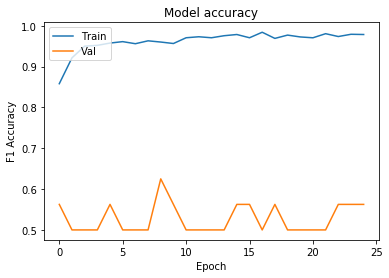

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1 Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

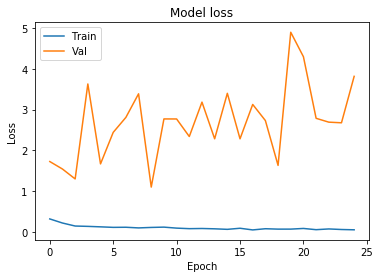

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [20]:
# Play with the optimizer 

# Optimizer (already use rmsprop and adam)
# Let's try performance obtained with SGD

from keras.optimizers import SGD

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

classifier_op.compile(optimizer=sgd, loss='binary_crossentropy', metrics=[f1])

checkpointer = ModelCheckpoint(filepath='./saved_models/weights.best.from_new_cnn_scratch_SGD.hdf5', 
                               verbose=1, save_best_only=True)

history = classifier_op.fit_generator(
        train_generator,
        steps_per_epoch=2000 // 20,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=400 // 20,callbacks=[checkpointer], verbose=1)


Epoch 1/25
100/100 [==============================] - 130s 1s/step - loss: 0.1686 - f1: 0.9350 - val_loss: 1.9299 - val_f1: 0.5000

Epoch 00001: val_loss improved from inf to 1.92991, saving model to ./saved_models/weights.best.from_new_cnn_scratch_SGD.hdf5
Epoch 2/25
100/100 [==============================] - 115s 1s/step - loss: 0.1234 - f1: 0.9565 - val_loss: 3.2031 - val_f1: 0.5000

Epoch 00002: val_loss did not improve from 1.92991
Epoch 3/25
100/100 [==============================] - 114s 1s/step - loss: 0.1055 - f1: 0.9540 - val_loss: 2.1628 - val_f1: 0.5625

Epoch 00003: val_loss did not improve from 1.92991
Epoch 4/25
100/100 [==============================] - 114s 1s/step - loss: 0.0907 - f1: 0.9645 - val_loss: 3.8439 - val_f1: 0.5625

Epoch 00004: val_loss did not improve from 1.92991
Epoch 5/25
100/100 [==============================] - 114s 1s/step - loss: 0.1058 - f1: 0.9615 - val_loss: 1.7676 - val_f1: 0.5625

Epoch 00005: val_loss improved from 1.92991 to 1.76758, savin

In [21]:
# Load the Model with the Best Validation Loss
classifier_op.load_weights('saved_models/weights.best.from_new_cnn_scratch_SGD.hdf5')

In [22]:
# Test the trained model

chest_xray_predictions = [np.argmax(classifier_op.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = np.sum(np.array(chest_xray_predictions)==np.argmax(test_target, axis=1))/len(chest_xray_predictions)
print('F1 score: ',test_accuracy)

F1 score:  0.7852564102564102


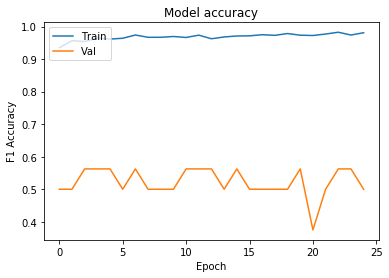

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1 Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

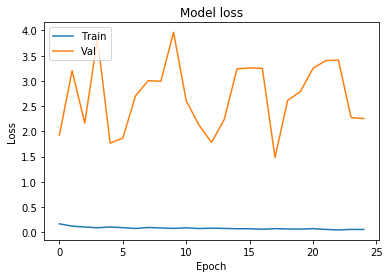

In [24]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [6]:
# Step 4 - Transfer Learning
# Step 4 - 1 : InceptionV3

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint  

from keras.preprocessing.image import ImageDataGenerator

import import_ipynb
from F1_score import f1

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        './chest_xray/train',
        target_size=(224, 224),
        batch_size=20)

test_generator = test_datagen.flow_from_directory(
        './chest_xray/test',
        target_size=(224, 224),
        batch_size=20)

validation_generator = val_datagen.flow_from_directory(
        './chest_xray/val',
        target_size=(224, 224),
        batch_size=20)

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer 
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
Fine_Transfer = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
Fine_Transfer.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1])


checkpointer = ModelCheckpoint(filepath='./saved_models/weights.best.from_transfer_learning.hdf5', 
                               verbose=1, save_best_only=True)

# train the model on the new data for a few epochs
history = Fine_Transfer.fit_generator(train_generator,
        steps_per_epoch=200 // 20,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=400 // 20,callbacks=[checkpointer], verbose=1)

importing Jupyter notebook from F1_score.ipynb
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/5
10/10 [==============================] - 54s 5s/step - loss: 2.1076 - f1: 0.6250 - val_loss: 4.2794 - val_f1: 0.5000

Epoch 00001: val_loss improved from inf to 4.27944, saving model to ./saved_models/weights.best.from_transfer_learning.hdf5
Epoch 2/5
10/10 [==============================] - 47s 5s/step - loss: 0.5627 - f1: 0.7150 - val_loss: 1.6301 - val_f1: 0.5000

Epoch 00002: val_loss improved from 4.27944 to 1.63008, saving model to ./saved_models/weights.best.from_transfer_learning.hdf5
Epoch 3/5
10/10 [==============================] - 45s 5s/step - loss: 0.4561 - f1: 0.7900 - val_loss: 0.6183 - val_f1: 0.7500

Epoch 00003: val_loss improved from 1.63008 to 0.61827, saving model to ./saved_models/weights.best.from_transfer_learning.hdf5
Epoch 4/5
10/10 [==============================] - 44s 4s/step - l

In [7]:
from keras.utils import plot_model
plot_model(Fine_Transfer, to_file='Model_png/model_Inception_Transfer_learning.png')

In [8]:
# Load the Model with the Best Validation Loss (transfer learning)
Fine_Transfer.load_weights('saved_models/weights.best.from_transfer_learning.hdf5')

In [13]:
# Test the trained model

chest_xray_predictions = [np.argmax(Fine_Transfer.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = np.sum(np.array(chest_xray_predictions)==np.argmax(test_target, axis=1))/len(chest_xray_predictions)
print('F1 score: ',test_accuracy)

F1 score:  0.657051282051282


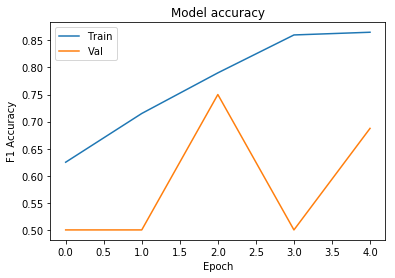

In [16]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1 Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

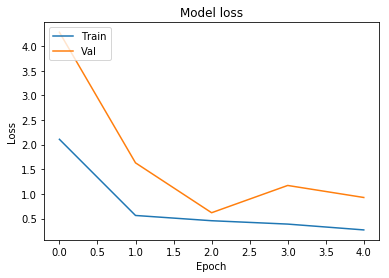

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [18]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_2
1 conv2d_95
2 batch_normalization_95
3 activation_95
4 conv2d_96
5 batch_normalization_96
6 activation_96
7 conv2d_97
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_98
12 batch_normalization_98
13 activation_98
14 conv2d_99
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_103
19 batch_normalization_103
20 activation_103
21 conv2d_101
22 conv2d_104
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_10
28 conv2d_100
29 conv2d_102
30 conv2d_105
31 conv2d_106
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed0
41 conv2d_110
42 batch_normalization_110
43 activation_110
44 conv2d_108
45 conv2d_111
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 average_pooling2d_11
51 conv2d_107
52 conv2d_109
53 co

In [24]:
# we chose to train the low inception blocks, i.e. we will freeze
# the first layers and unfreeze the rest:
for layer in Fine_Transfer.layers[:33]:
   layer.trainable = True
for layer in Fine_Transfer.layers[33:]:
   layer.trainable = False


# compile the model (should be done *after* setting layers to non-trainable)
Fine_Transfer.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1])

checkpointer = ModelCheckpoint(filepath='./saved_models/weights.best.from_transfer_learning_fine_tuning.hdf5', 
                               verbose=1, save_best_only=True)

# train the model on the new data for a few epochs
Fine_Transfer.fit_generator(train_generator,
        steps_per_epoch=200 // 20,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=400 // 20,callbacks=[checkpointer], verbose=1)


Epoch 1/5
10/10 [==============================] - 147s 15s/step - loss: 0.3969 - f1: 0.8750 - val_loss: 0.6985 - val_f1: 0.6250

Epoch 00001: val_loss improved from inf to 0.69854, saving model to ./saved_models/weights.best.from_transfer_learning_fine_tuning.hdf5
Epoch 2/5
10/10 [==============================] - 129s 13s/step - loss: 0.3431 - f1: 0.9300 - val_loss: 0.7584 - val_f1: 0.5625

Epoch 00002: val_loss did not improve from 0.69854
Epoch 3/5
10/10 [==============================] - 131s 13s/step - loss: 0.3285 - f1: 0.9250 - val_loss: 0.6960 - val_f1: 0.5625

Epoch 00003: val_loss improved from 0.69854 to 0.69600, saving model to ./saved_models/weights.best.from_transfer_learning_fine_tuning.hdf5
Epoch 4/5
10/10 [==============================] - 126s 13s/step - loss: 0.3125 - f1: 0.9300 - val_loss: 0.7752 - val_f1: 0.5000

Epoch 00004: val_loss did not improve from 0.69600
Epoch 5/5
10/10 [==============================] - 129s 13s/step - loss: 0.3178 - f1: 0.9000 - val_los

In [25]:
# Load the Model with the Best Validation Loss
Fine_Transfer.load_weights('saved_models/weights.best.from_transfer_learning_fine_tuning.hdf5')

In [26]:
# Test the trained model

chest_xray_predictions = [np.argmax(Fine_Transfer.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = np.sum(np.array(chest_xray_predictions)==np.argmax(test_target, axis=1))/len(chest_xray_predictions)
print('F1 score: ',test_accuracy)

F1 score:  0.7131410256410257


In [27]:
# Step 5 : CAM

from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys


In [31]:
#img_path = './chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'
#img_path = './chest_xray/test/PNEUMONIA/person1649_virus_2850.jpeg'
#img_path = './chest_xray/test/NORMAL/IM-0111-0001.jpeg'
img_path = './chest_xray/test/NORMAL/NORMAL2-IM-0313-0001.jpeg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = Fine_Transfer.predict(x)
class_idx = np.argmax(preds[0])
class_output = Fine_Transfer.output[:, class_idx]
last_conv_layer = Fine_Transfer.get_layer("mixed10")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([Fine_Transfer.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
cv2.imshow("Original", img)
cv2.imshow("GradCam", superimposed_img)
cv2.waitKey(30)

-1